In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
customer_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_4/Day_1/Morning/Jahn-lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
def clean_column_names(df):
    # Clean column names to follow PEP 8 naming convention
    cleaned_columns = [col.lower().strip().replace(' ', '_') for col in df.columns]
    df.columns = cleaned_columns
    return df

In [7]:
customer_df2 = clean_column_names(customer_df)

In [8]:
customer_df2['effective_to_date'] = pd.to_datetime(customer_df2['effective_to_date'])

In [9]:
customer_df2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
def split_numerical_categorical_columns(df):
    
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
   
    numerical_df = df[numerical_cols]
    categorical_df = df[categorical_cols]
    
    return numerical_df, categorical_df

In [11]:
numerical_data, categorical_data = split_numerical_categorical_columns(customer_df2)

In [12]:
numerical_data.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
categorical_data.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
categorical_data = categorical_data.drop(columns = 'customer')

In [15]:
categorical_data.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


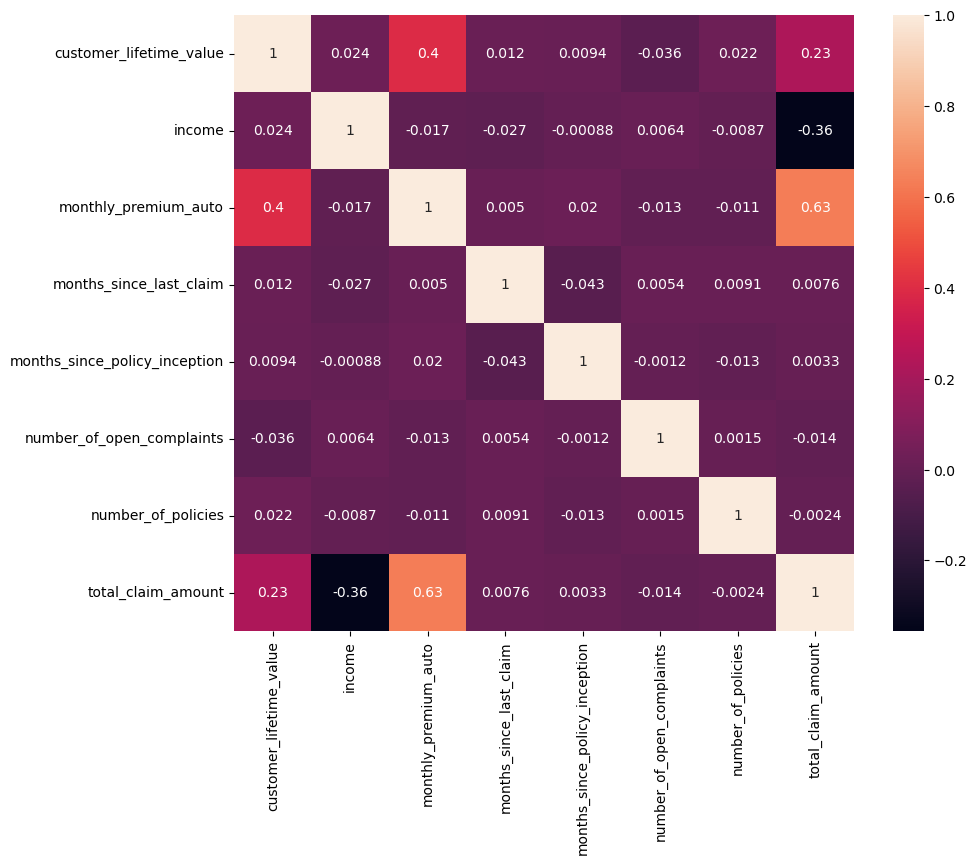

In [17]:
corr_matrix=numerical_data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
def split_continuous_discrete_columns(df, unique_threshold=36):
    continuous_cols = []
    discrete_cols = []

    for col in df.select_dtypes(include=['number']):
        if df[col].nunique() > unique_threshold:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [23]:
continuous_df, discrete_df = split_continuous_discrete_columns(customer_df2, unique_threshold=36)

In [28]:
def plot_discrete_columns(discrete_df):
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Iterate over the columns in the DataFrame
    for col in discrete_df.columns:
        # Create a bar plot for each column
        sns.countplot(data=discrete_df, x=col)
        plt.title(f'Bar Plot - {col}')
        plt.show()

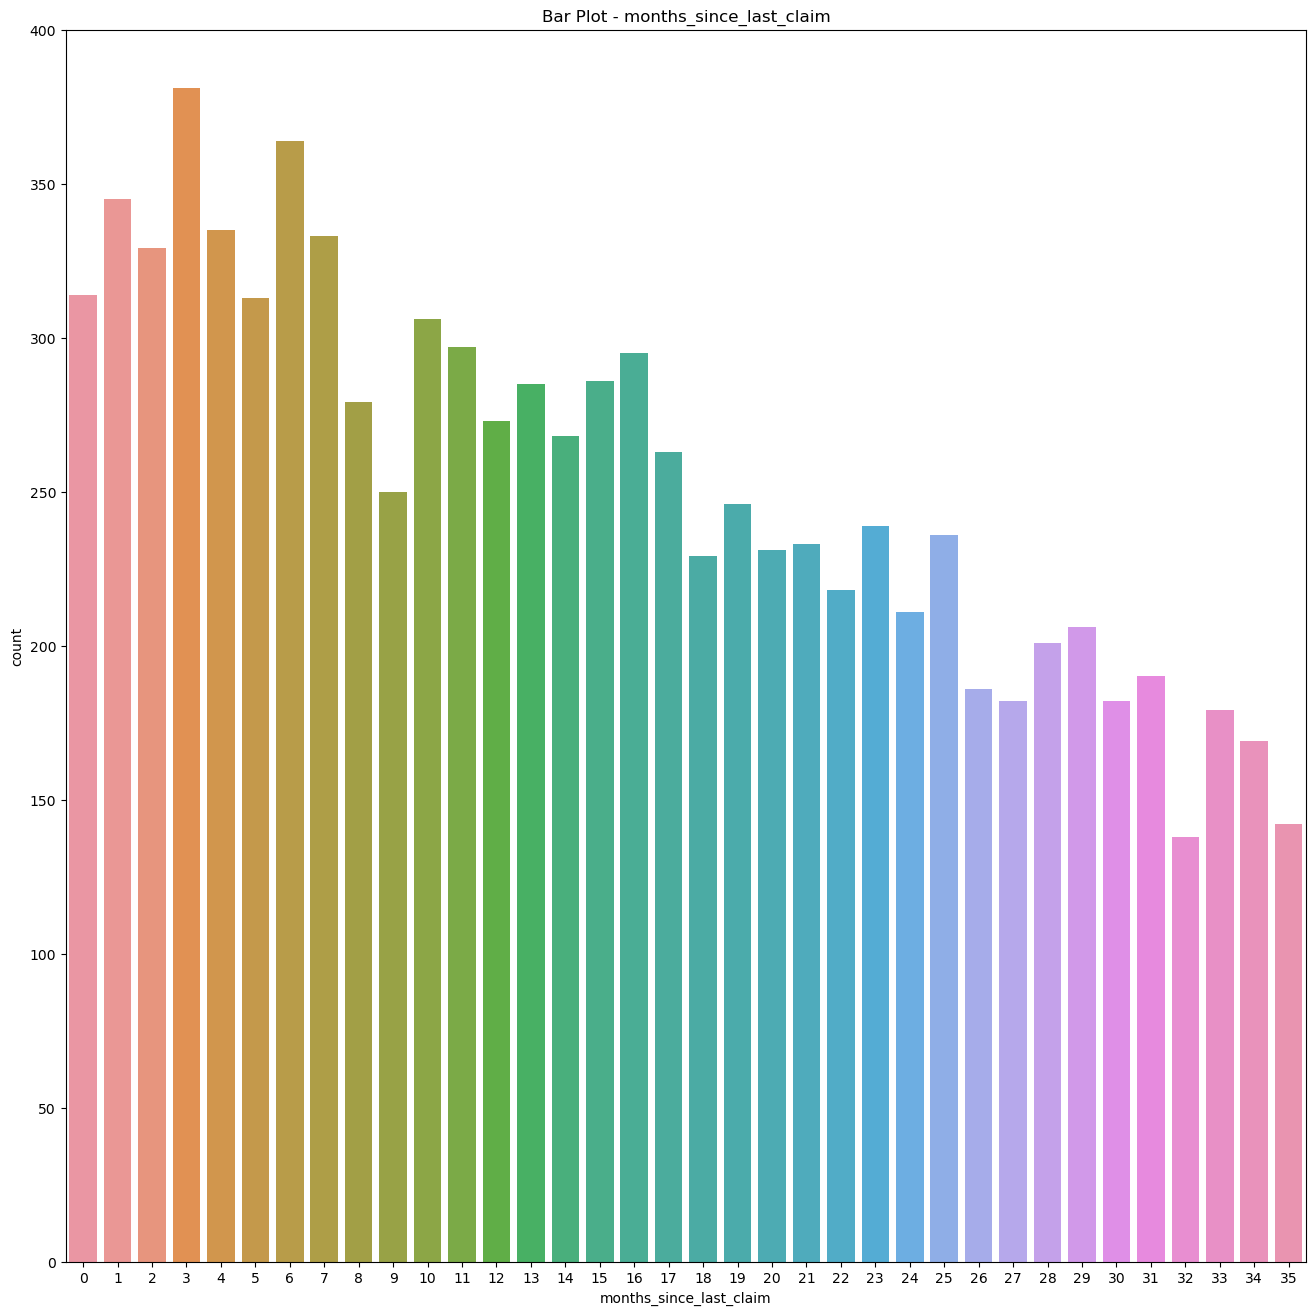

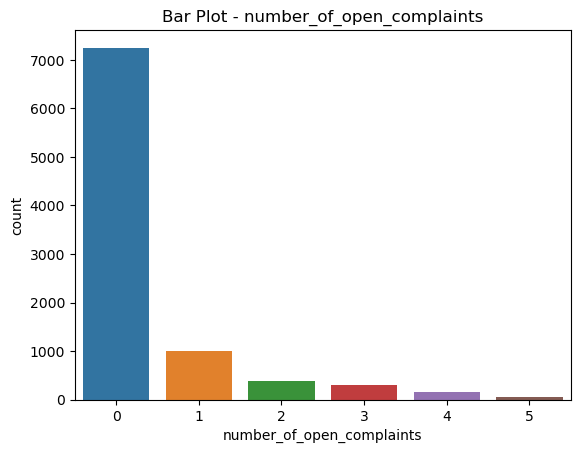

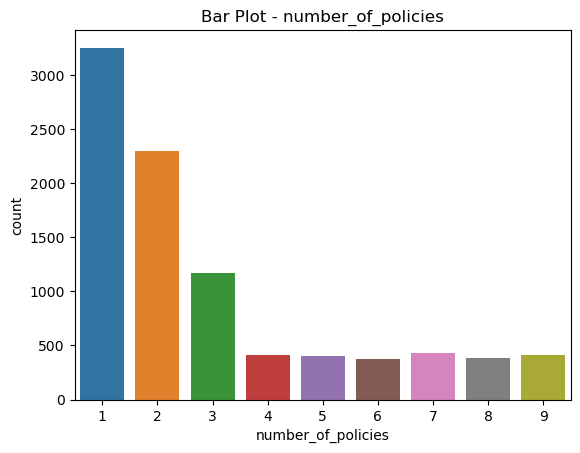

In [29]:
plot_discrete_columns(discrete_df)

In [26]:
def plot_continuous_columns(continuous_df):
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Iterate over the columns in the DataFrame
    for col in continuous_df.columns:
        # Create a histogram for each column
        sns.histplot(data=continuous_df, x=col, kde=True)
        plt.title(f'Histogram - {col}')
        plt.show()

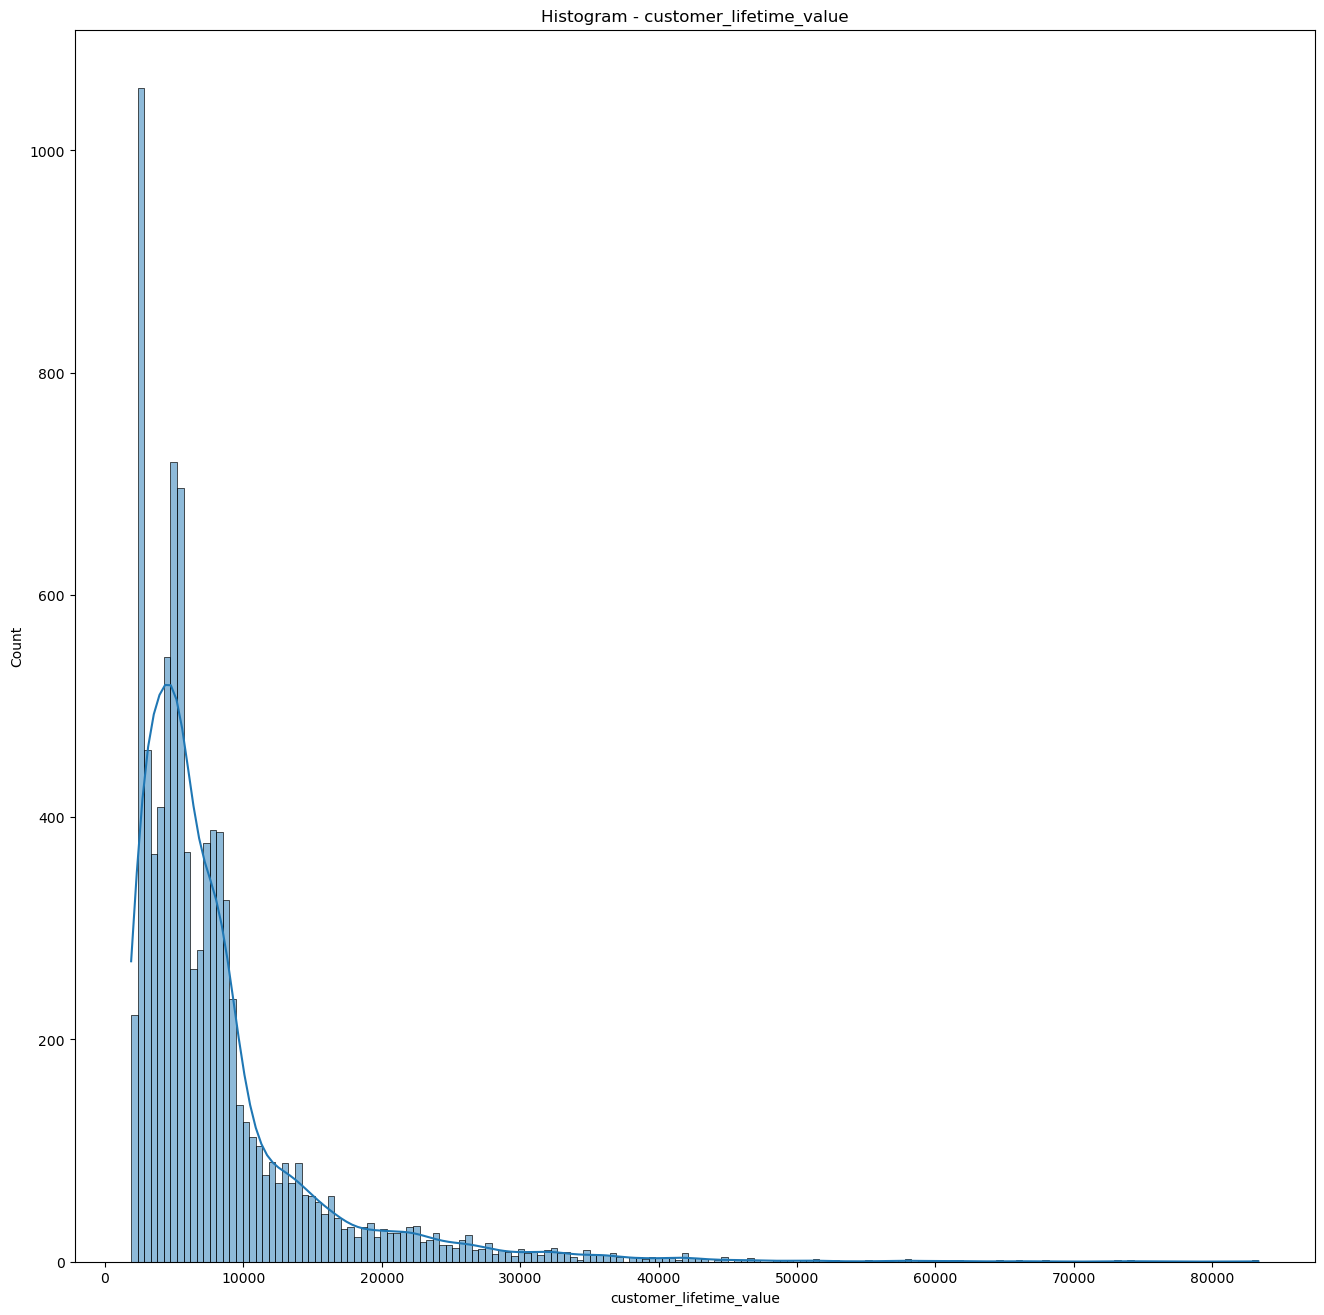

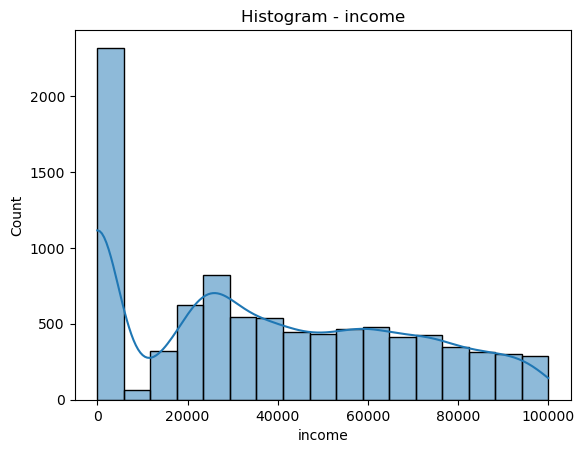

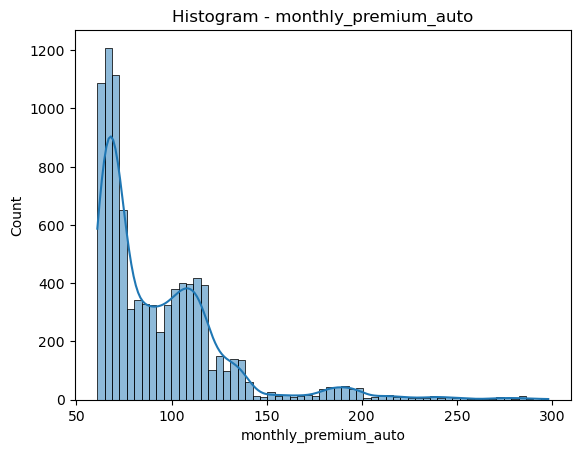

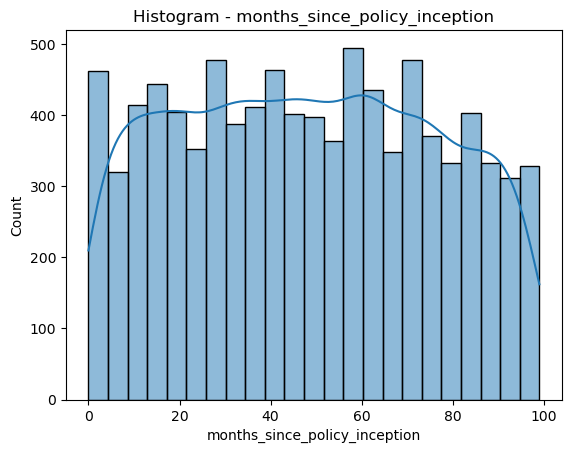

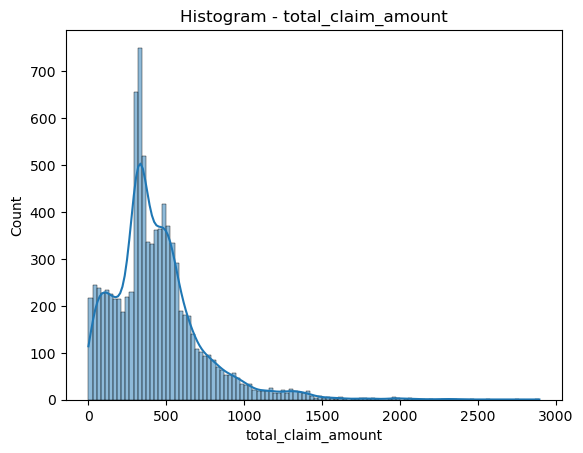

In [27]:
plot_continuous_columns(continuous_df)

In [32]:
print("13. According to the previous histogram plots, do you think that you will have to apply any transformation?")
print()
print()
print("Yes, multiple plots are skewed")

13. According to the previous histogram plots, do you think that you will have to apply any transformation?


Yes, multiple plots are skewed


In [34]:
(continuous_df['customer_lifetime_value'].skew() > 2) or (continuous_df['customer_lifetime_value'].skew() < -2), continuous_df['customer_lifetime_value'].skew()

(True, 3.0322802599299847)

In [36]:
(continuous_df['income'].skew() > 2) or (continuous_df['income'].skew() < -2), continuous_df['income'].skew()

(False, 0.28688727581189166)

In [37]:
(continuous_df['monthly_premium_auto'].skew() > 2) or (continuous_df['monthly_premium_auto'].skew() < -2), continuous_df['monthly_premium_auto'].skew()

(True, 2.1235464499475345)

In [39]:
(continuous_df['months_since_policy_inception'].skew() > 2) or (continuous_df['months_since_policy_inception'].skew() < -2), continuous_df['months_since_policy_inception'].skew()

(False, 0.040164961597799524)

In [40]:
(continuous_df['total_claim_amount'].skew() > 2) or (continuous_df['total_claim_amount'].skew() < -2), continuous_df['total_claim_amount'].skew()

(False, 1.7149658097209557)

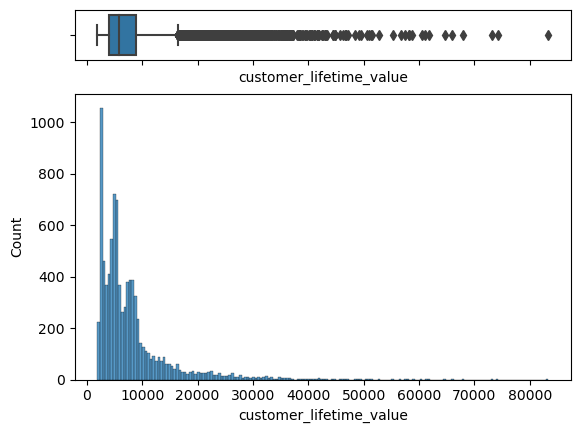

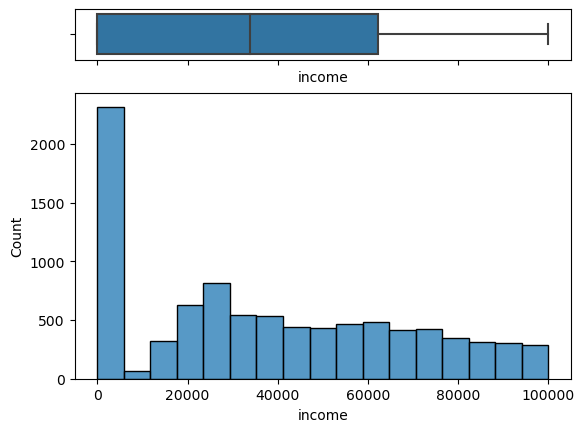

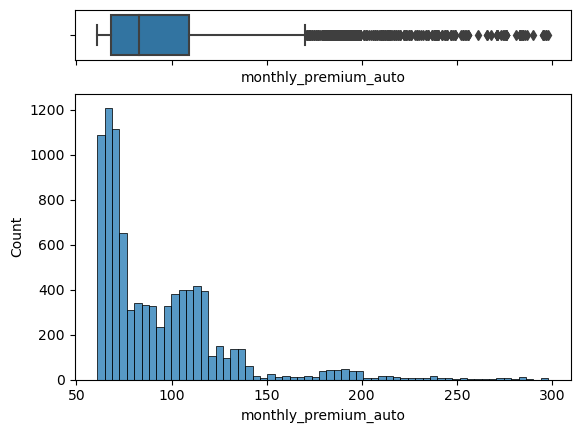

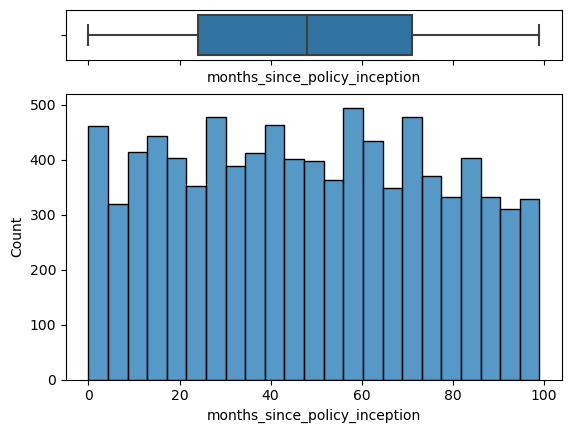

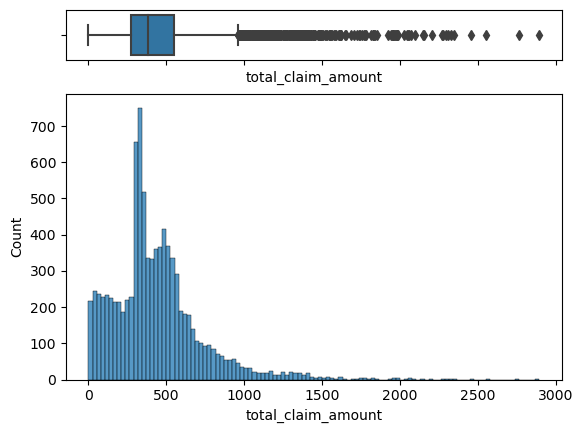

In [41]:
selected_columns = ["customer_lifetime_value","income","monthly_premium_auto","months_since_policy_inception","total_claim_amount"]
for column in selected_columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=continuous_df, x=column, ax=ax_box)
    sns.histplot(data=continuous_df, x=column, ax=ax_hist)
    plt.show()